In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
import numpy as np

import os
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
base_dir = '/Users/goflv/workspace/ai_service/ai/team_project/dobae_git/wallpaperDefect/proj1/open/'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
types_list = os.listdir(train_dir)

In [3]:
data = []
pic_count = []

for types in types_list:
    type_path = os.path.join(train_dir, types)
    image_list = os.listdir(type_path)
    list_len = len(image_list)
    pic_count.append(list_len)
    
    for image_name in image_list:
        image_path = os.path.join(type_path, image_name)
        img_array = np.fromfile(image_path, np.uint8)
        img = cv.imdecode(img_array, cv.IMREAD_COLOR)
        img = cv.resize(img, (400,400), interpolation=cv.INTER_AREA)
#         resize = cv.resize(img, (400,400), interpolation=cv.INTER_CUBIC)
#         gray = cv.cvtColor(resize, cv.COLOR_BGR2GRAY)
#         threshold, thresh = cv.threshold(gray,150, 255, cv.THRESH_BINARY)
        data.append(img)

In [4]:
answer = []
for idx, nm in enumerate(types_list):
        answer += [nm] * pic_count[idx]
answer = np.array(answer)

Text(0.5, 1.0, '몰딩수정')

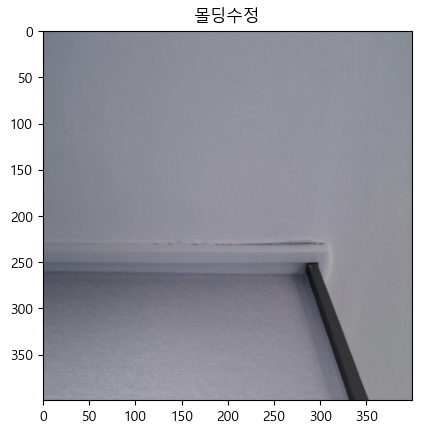

In [41]:
num = 901
# plt.imshow(data[num], cmap='gray')
plt.imshow(data[num])
plt.title(answer[num])

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(19, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [7]:
datagen = ImageDataGenerator( rescale = 1.0/255.,
                               rotation_range = 20,
                            width_shift_range=0.2,
                            height_shift_range=0.2)
datagen.fit(data, augment=True, rounds=10)

MemoryError: Unable to allocate 61.8 GiB for an array with shape (34570, 400, 400, 3) and data type float32

In [43]:
data = np.array(data)

In [ ]:
train_img, val_img, train_answer, val_answer = train_test_split(data, answer, test_size=0.2, shuffle)

In [ ]:
model.fit_generator(datagen.flow(data, answer, batch_size=32), steps_per_epoch=len(data)/32)

In [ ]:
history = model.fit(train_img, train_answer,
                    validation_data=(val_img, val_answer),
                    steps_per_epoch=8,
                    epochs=10,
                    validation_steps=9,
                    verbose=2)